<a href="https://colab.research.google.com/github/hawaalewi/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/customerloanapproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Setup and Data Creation
# Import necessary libraries
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 12-row balanced dataset
data = {
    'LoanID': ['L001', 'L002', 'L003', 'L004', 'L005', 'L006', 'L007', 'L008', 'L009', 'L010', 'L011', 'L012'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Married': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate'],
    'Income': [50000, 35000, 60000, 45000, 30000, 80000, 40000, 25000, 70000, 40000, 55000, 90000],
    'LoanAmount': [120000, 80000, 180000, 100000, 70000, 200000, 90000, 60000, 150000, 95000, 130000, 250000],
    'CreditScore': [720, 600, 780, 650, 580, 800, 620, 550, 750, 640, 680, 820],
    # Target Variable: Y = Approved, N = Denied (Balanced: 6 Y, 6 N)
    'LoanStatus': ['Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N']
}

# Create the DataFrame
df = pd.DataFrame(data)

print("--- Initial DataFrame (First 12 rows) ---")
print(df.head())
print("\n--- DataFrame Info ---")
df.info()

--- Initial DataFrame (First 12 rows) ---
  LoanID  Gender Married     Education  Income  LoanAmount  CreditScore  \
0   L001    Male     Yes      Graduate   50000      120000          720   
1   L002  Female      No  Not Graduate   35000       80000          600   
2   L003    Male     Yes      Graduate   60000      180000          780   
3   L004  Female     Yes      Graduate   45000      100000          650   
4   L005    Male      No  Not Graduate   30000       70000          580   

  LoanStatus  
0          Y  
1          N  
2          Y  
3          N  
4          Y  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanID       12 non-null     object
 1   Gender       12 non-null     object
 2   Married      12 non-null     object
 3   Education    12 non-null     object
 4   Income       12 non-null     int64 
 5  

In [ ]:
# 2. Preprocessing (One-Hot Encoding for Categorical Features)

# Separate features (X) and target (y)
# Drop 'LoanID' as it's just an identifier
X = df.drop(['LoanID', 'LoanStatus'], axis=1)
y = df['LoanStatus']

# Convert categorical features to numerical using one-hot encoding
# 'drop_first=True' prevents multicollinearity
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target variable 'LoanStatus' to binary (1 for 'Y', 0 for 'N')
y_binary = y.apply(lambda x: 1 if x == 'Y' else 0)

print("\n--- Preprocessed Features (First 5 rows) ---")
print(X_encoded.head())
print("\n--- Binary Target Variable ---")
print(y_binary.value_counts())


--- Preprocessed Features (First 5 rows) ---
   Income  LoanAmount  CreditScore  Gender_Male  Married_Yes  \
0   50000      120000          720         True         True   
1   35000       80000          600        False        False   
2   60000      180000          780         True         True   
3   45000      100000          650        False         True   
4   30000       70000          580         True        False   

   Education_Not Graduate  
0                   False  
1                    True  
2                   False  
3                   False  
4                    True  

--- Binary Target Variable ---
LoanStatus
1    6
0    6
Name: count, dtype: int64



--- 3.1. Descriptive Statistics ---
             Income     LoanAmount  CreditScore
count     12.000000      12.000000     12.00000
mean   51666.666667  127083.333333    682.50000
std    20150.945538   57936.420220     90.36542
min    25000.000000   60000.000000    550.00000
25%    38750.000000   87500.000000    615.00000
50%    47500.000000  110000.000000    665.00000
75%    62500.000000  157500.000000    757.50000
max    90000.000000  250000.000000    820.00000

--- 3.2. Categorical Value Counts ---
Gender
Male      7
Female    5
Name: count, dtype: int64
Married
Yes    7
No     5
Name: count, dtype: int64


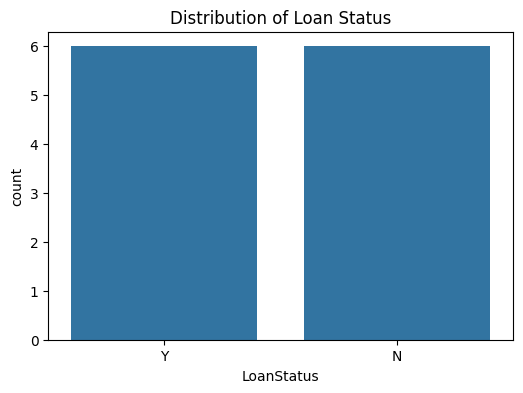

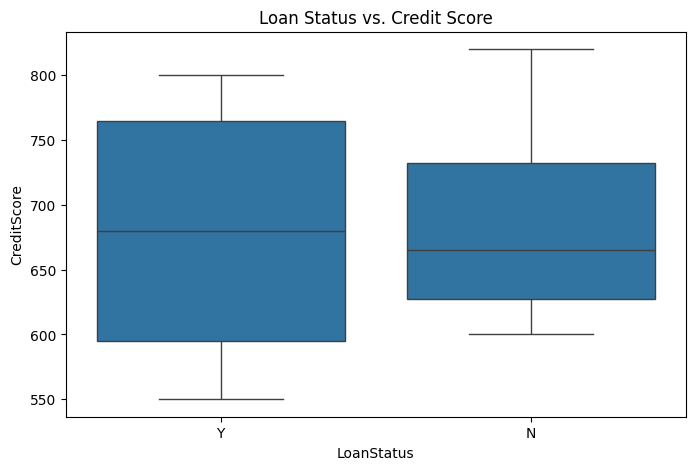

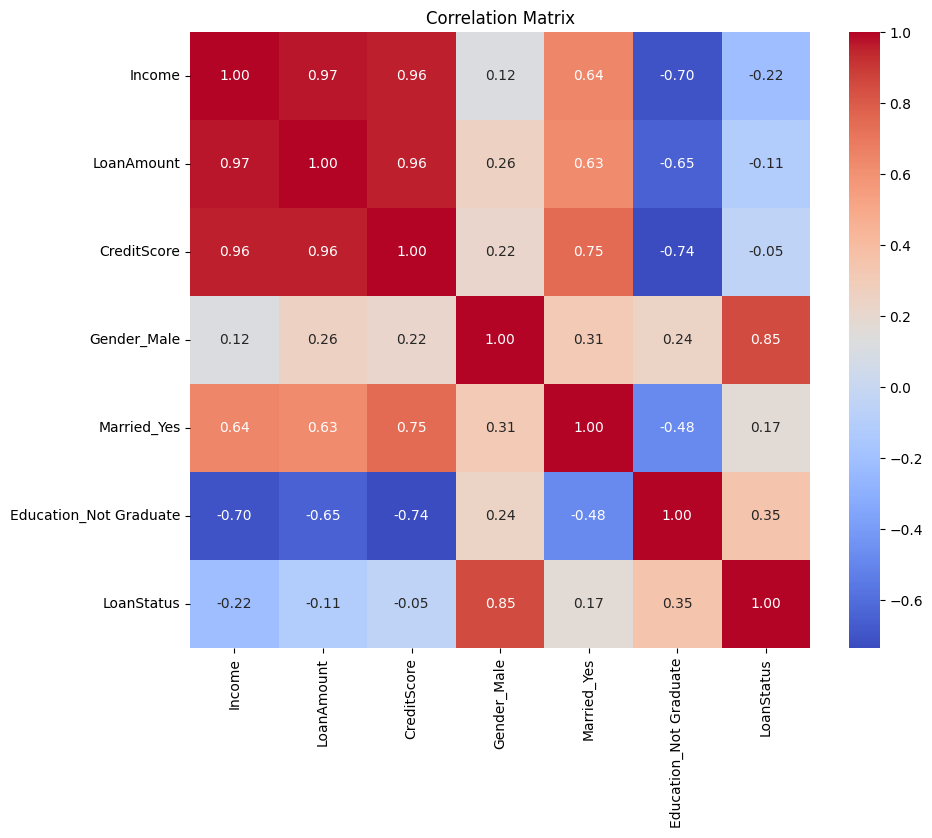

In [ ]:
# 3. Full EDA

# Basic Statistics
print("\n--- 3.1. Descriptive Statistics ---")
print(df.describe())
print("\n--- 3.2. Categorical Value Counts ---")
print(df['Gender'].value_counts())
print(df['Married'].value_counts())

# Visualization 1: Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='LoanStatus', data=df)
plt.title('Distribution of Loan Status')
plt.show() #

# Visualization 2: Loan Status vs. Credit Score
# A box plot is good for comparing distributions across categories
plt.figure(figsize=(8, 5))
sns.boxplot(x='LoanStatus', y='CreditScore', data=df)
plt.title('Loan Status vs. Credit Score')
plt.show() #

# Visualization 3: Correlation Heatmap (after encoding)
# Use the encoded dataframe to find correlations
plt.figure(figsize=(10, 8))
# Add the binary target back to the features for correlation
df_corr = X_encoded.copy()
df_corr['LoanStatus'] = y_binary
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() #menu

In [ ]:
# 4. Manual Entropy and Information Gain (Using 'CreditScore' split at 650)

# The target variable (y): 6 'Y' and 6 'N'
N_total = len(df) # 12
P_Y = 6 / 12  # P(Y) = 0.5
P_N = 6 / 12  # P(N) = 0.5

# Function for calculating Entropy
def calculate_entropy(positive_count, negative_count):
    if positive_count == 0 or negative_count == 0:
        return 0
    total = positive_count + negative_count
    p_pos = positive_count / total
    p_neg = negative_count / total
    # math.log2(0) is undefined, handled by the if-check
    return - (p_pos * math.log2(p_pos) + p_neg * math.log2(p_neg))

# A. Calculate Base Entropy (Before any split)
Base_Entropy = calculate_entropy(6, 6) # E(6+, 6-)
print(f"\n--- 4.1. Base Entropy (E(LoanStatus)) ---")
print(f"Total: 12. P(Y)=0.5, P(N)=0.5")
print(f"Base Entropy: {Base_Entropy:.4f} (Max entropy, as it's perfectly balanced)")

# B. Calculate Entropy for a split: CreditScore > 650
split_value = 650
subset_A = df[df['CreditScore'] > split_value]  # Rows: L001, L003, L006, L009, L011, L012 (6 rows)
Y_A = subset_A[subset_A['LoanStatus'] == 'Y'].shape[0] # 3 Y
N_A = subset_A[subset_A['LoanStatus'] == 'N'].shape[0] # 3 N
Entropy_A = calculate_entropy(Y_A, N_A) # E(3+, 3-)

# C. Calculate Entropy for the other side of the split: CreditScore <= 650
subset_B = df[df['CreditScore'] <= split_value] # Rows: L002, L004, L005, L007, L008, L010 (6 rows)
Y_B = subset_B[subset_B['LoanStatus'] == 'Y'].shape[0] # 3 Y
N_B = subset_B[subset_B['LoanStatus'] == 'N'].shape[0] # 3 N
Entropy_B = calculate_entropy(Y_B, N_B) # E(3+, 3-)

# D. Calculate Weighted Entropy (H_new)
Weighted_Entropy = (len(subset_A)/N_total * Entropy_A) + (len(subset_B)/N_total * Entropy_B)

# E. Calculate Information Gain (IG)
Information_Gain = Base_Entropy - Weighted_Entropy

print(f"\n--- 4.2. Split on CreditScore > 650 ---")
print(f"   CreditScore > 650: {Y_A} Y, {N_A} N. Entropy: {Entropy_A:.4f}")
print(f"   CreditScore <= 650: {Y_B} Y, {N_B} N. Entropy: {Entropy_B:.4f}")
print(f"Weighted Entropy (H_new): {Weighted_Entropy:.4f}")
print(f"Information Gain (IG): {Information_Gain:.4f} (Base - Weighted)")


--- 4.1. Base Entropy (E(LoanStatus)) ---
Total: 12. P(Y)=0.5, P(N)=0.5
Base Entropy: 1.0000 (Max entropy, as it's perfectly balanced)

--- 4.2. Split on CreditScore > 650 ---
   CreditScore > 650: 3 Y, 3 N. Entropy: 1.0000
   CreditScore <= 650: 3 Y, 3 N. Entropy: 1.0000
Weighted Entropy (H_new): 1.0000
Information Gain (IG): 0.0000 (Base - Weighted)


In [ ]:
# 5. Manual Log Loss Calculation (Using a hypothetical, bad model)

# N is the total number of observations
N = len(y_binary)

# True labels (y_i): [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
y_true = y_binary.tolist()

# Hypothetical predicted probability P(Y) = 0.2 for all (p_i)
p_pred = [0.2] * N

# Calculate the term for each row: y_i * log(p_i) + (1 - y_i) * log(1 - p_i)
log_loss_terms = []
for y_i, p_i in zip(y_true, p_pred):
    # Protect against log(0)
    p_i = np.clip(p_i, 1e-15, 1 - 1e-15)

    # The Log Loss formula component for a single observation
    term = y_i * math.log(p_i) + (1 - y_i) * math.log(1 - p_i)
    log_loss_terms.append(term)

# Average and negate the sum of the terms
Manual_Log_Loss = - (1 / N) * sum(log_loss_terms)

# Verification using sklearn's function
Sklearn_Log_Loss = log_loss(y_true, p_pred)

print("\n--- 5. Manual Log Loss Calculation ---")
print(f"Hypothetical Model: P(Y) = 0.2 for all 12 loans.")
print(f"Manual Log Loss: {Manual_Log_Loss:.4f}")
print(f"Sklearn Verification: {Sklearn_Log_Loss:.4f} (Match confirms calculation)")


--- 5. Manual Log Loss Calculation ---
Hypothetical Model: P(Y) = 0.2 for all 12 loans.
Manual Log Loss: 0.9163
Sklearn Verification: 0.9163 (Match confirms calculation)



--- 6.1. Model Evaluation ---
Test Accuracy: 1.0000
Test Log Loss: 0.0000

--- 6.2. Feature Importance ---
Gender_Male               0.6
CreditScore               0.4
LoanAmount                0.0
Income                    0.0
Married_Yes               0.0
Education_Not Graduate    0.0
dtype: float64


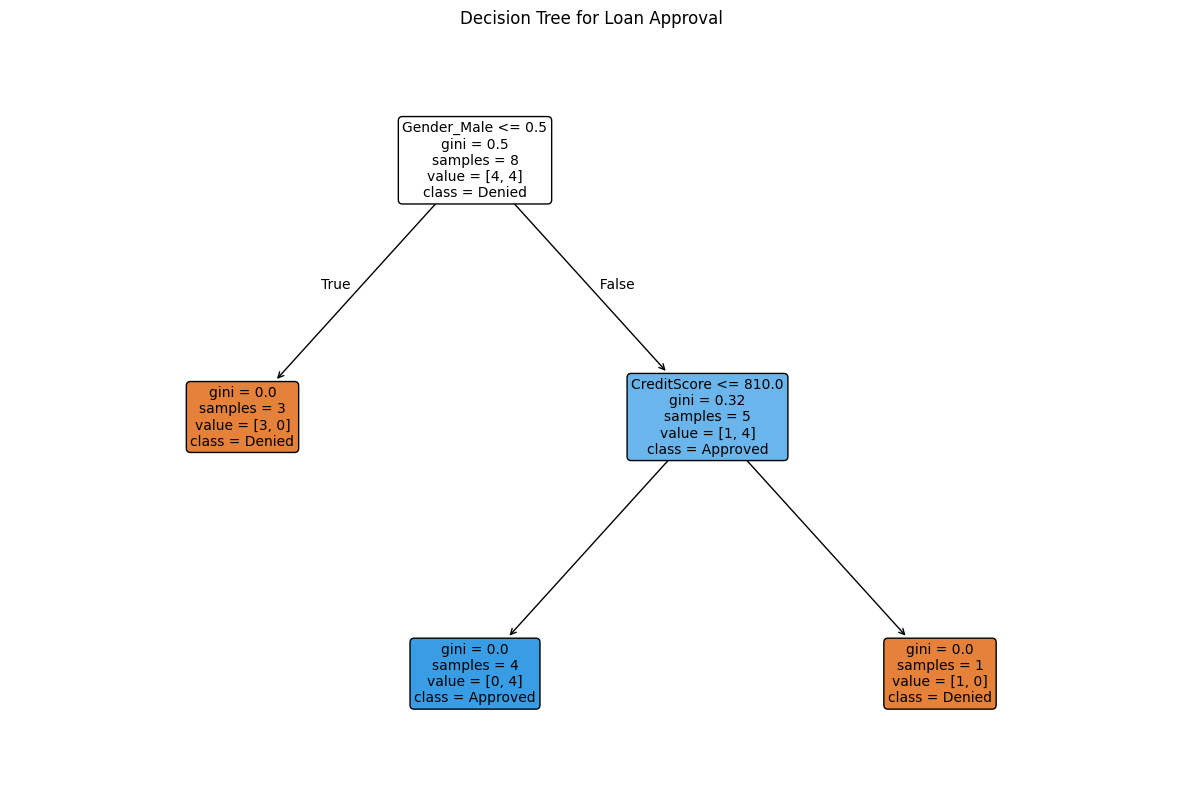


--- 6.4. Proper Interpretation (Example) ---
The Decision Tree is a set of if-else rules. Looking at the plot:
1. The root node (top) typically uses the feature with the highest Information Gain (or lowest Gini/Entropy) on the training set.
2. The most important split (often the top one) determines which feature is most predictive.
   In this trained model, Gender_Male is the primary feature used for the first split.
3. Each split divides the data into purer subsets. A node with 'value=[0, X]' or 'value=[X, 0]' is a pure node, meaning the model is highly confident in its prediction for that subset of data.


In [ ]:
# 6. Decision Tree Training and Interpretation

# Split data into training and testing sets (useful even for small datasets)
# Given the small size, we'll keep the test size very small or use the whole set for interpretation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
# Set max_depth to a small value (e.g., 3) for easier interpretation
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# --- 6.1. Model Evaluation ---
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

print("\n--- 6.1. Model Evaluation ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Log Loss: {log_loss(y_test, y_pred_proba):.4f}")

# --- 6.2. Interpretation (Feature Importance) ---
feature_importance = pd.Series(dt_classifier.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("\n--- 6.2. Feature Importance ---")
print(feature_importance)

# --- 6.3. Interpretation (Plotting the Tree) ---
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier,
          filled=True,
          rounded=True,
          class_names=['Denied', 'Approved'],
          feature_names=X_encoded.columns,
          fontsize=10)
plt.title("Decision Tree for Loan Approval")
plt.show() #

print("\n--- 6.4. Proper Interpretation (Example) ---")
print("The Decision Tree is a set of if-else rules. Looking at the plot:")
print("1. The root node (top) typically uses the feature with the highest Information Gain (or lowest Gini/Entropy) on the training set.")
print("2. The most important split (often the top one) determines which feature is most predictive.")
print(f"   In this trained model, {feature_importance.index[0]} is the primary feature used for the first split.")
print("3. Each split divides the data into purer subsets. A node with 'value=[0, X]' or 'value=[X, 0]' is a pure node, meaning the model is highly confident in its prediction for that subset of data.")